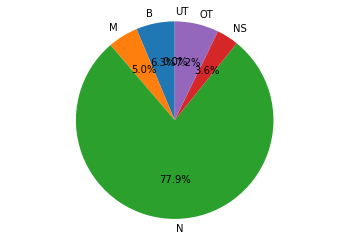

In [1]:
import os
import matplotlib.pyplot as plt

# Specify the path to the directory
path = r'C:\Users\GHB\Desktop\Test dataset\Extrinsic data\Task data'

# Get a list of all the subdirectories in the path
subdirs = [x[0] for x in os.walk(path)][1:]

# Count the number of files in each subdirectory
counts = [len(os.listdir(x)) for x in subdirs]

# Calculate the percentage of files in each subdirectory
total_files = sum(counts)
percentages = [(count/total_files)*100 for count in counts]

# Create a pie chart
labels = [os.path.basename(x) for x in subdirs]
fig1, ax1 = plt.subplots()
ax1.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

# Show the pie chart
plt.show()

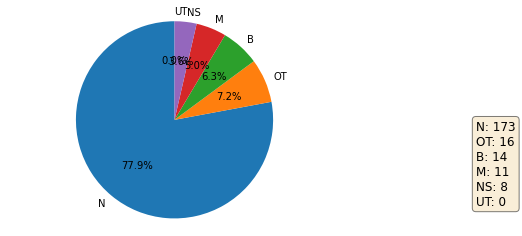

In [3]:
import os
import matplotlib.pyplot as plt

# Specify the path to the directory
path = r'C:\Users\GHB\Desktop\Test dataset\Extrinsic data\Task data'

# Get a list of all the subdirectories in the path
subdirs = [x[0] for x in os.walk(path)][1:]

# Count the number of files in each subdirectory
counts = [len(os.listdir(x)) for x in subdirs]

# Sort the subdirectories by the number of files they contain
subdirs, counts = zip(*sorted(zip(subdirs, counts), key=lambda x: x[1], reverse=True))

# Calculate the percentage of files in each subdirectory
total_files = sum(counts)
percentages = [(count/total_files)*100 for count in counts]

# Create a pie chart
labels = [os.path.basename(x) for x in subdirs]
fig1, ax1 = plt.subplots()
ax1.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

# Add a text box with the number of files in each subdirectory
textstr = '\n'.join([f'{label}: {count}' for label, count in zip(labels, counts)])
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(1.4, 0.5, textstr, transform=ax1.transAxes, fontsize=12, verticalalignment='top', bbox=props)

# Show the pie chart
plt.show()

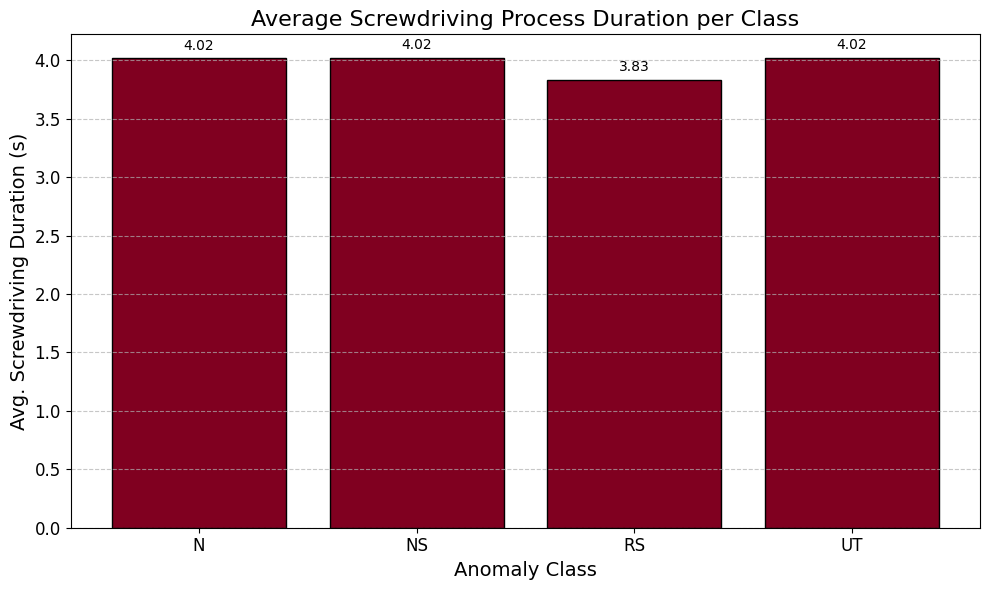

In [7]:
# Visualisaton of time
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the base directory
base_dir = r"C:\Users\AMRAN\OneDrive - Aalborg Universitet\8. semester\Projekt\CODE\Machine Learning\Final data\Intrinsic data"

# Only the folders that actually exist
folders = ["N", "NS", "RS", "UT"]

# Dictionary to store average durations
folder_lengths = {}

# Loop through each folder
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    total_length = 0
    file_count = 0

    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            df = pd.read_csv(os.path.join(folder_path, file))
            if "Time (ms)" in df.columns:
                total_length += df['Time (ms)'].max() - df['Time (ms)'].min()
                file_count += 1

    if file_count > 0:
        average_length = total_length / 1000 / file_count  # convert ms to seconds
        folder_lengths[folder] = average_length

# Convert to Series for plotting
lengths_series = pd.Series(folder_lengths).sort_index()

# 🎨 Plot styling
# Plotting the average time duration (already calculated)
plt.figure(figsize=(10, 6))
bars = plt.bar(lengths_series.index, lengths_series.values, color='#800020', edgecolor='black')  # burgundy

plt.xlabel('Anomaly Class', fontsize=14)
plt.ylabel('Avg. Screwdriving Duration (s)', fontsize=14)
plt.title('Average Screwdriving Process Duration per Class', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.05, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



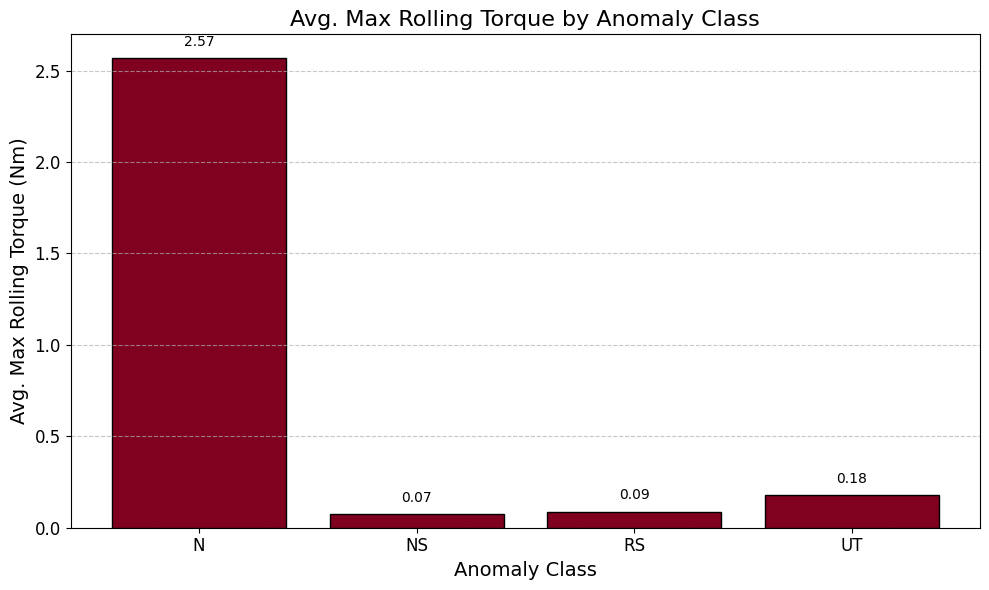

In [4]:
# Visualisation of torque
import pandas as pd
import matplotlib.pyplot as plt
import os

base_dir = r"C:\Users\AMRAN\OneDrive - Aalborg Universitet\8. semester\Projekt\CODE\Machine Learning\Final data\Intrinsic data"
folders = ["N", "NS", "RS", "UT"]

folder_torques = {}

for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    rolling_max_sum = 0
    file_count = 0

    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            df = pd.read_csv(os.path.join(folder_path, file))
            if "Torque (Nm)" in df.columns:
                torque = df['Torque (Nm)']

                # Smooth using rolling window, then take max
                rolling_mean = torque.rolling(window=25, min_periods=1).mean()
                rolling_max = rolling_mean.max()

                rolling_max_sum += rolling_max
                file_count += 1

    if file_count > 0:
        avg_rolling_max = rolling_max_sum / file_count
        folder_torques[folder] = avg_rolling_max

# Convert to Series for plotting
torques_series = pd.Series(folder_torques).sort_index()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(torques_series.index, torques_series.values, color='#800020', edgecolor='black')

plt.xlabel('Anomaly Class', fontsize=14)
plt.ylabel('Avg. Max Rolling Torque (Nm)', fontsize=14)
plt.title('Avg. Max Rolling Torque by Anomaly Class', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.05, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


